# Introduction
H-1B Visa has been a controversial topic in recent political debates. Without any political bias,below are some interesting insights about current distributions of this Visa.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from subprocess import check_output
from matplotlib.ticker import FuncFormatter
%matplotlib inline

# Loading and Cleaning the Data

In [7]:
## Loading the Data
h1b_df = pd.read_csv('../input/h-1b-visa/h1b_kaggle.csv')
print('Loading h1b_kaggle file... wait...')

Loading h1b_kaggle file... wait...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 11 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  int64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 251.8+ MB


In [11]:

print('Printing the columns details in the h1b_kaggle file...')
print(h1b_df.columns.values)
h1b_df.info()


Printing the columns details in the h1b_kaggle file...
['Unnamed: 0' 'CASE_STATUS' 'EMPLOYER_NAME' 'SOC_NAME' 'JOB_TITLE'
 'FULL_TIME_POSITION' 'PREVAILING_WAGE' 'YEAR' 'WORKSITE' 'lon' 'lat']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [19]:
h1b_df.head(5)


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [20]:
h1b_df.shape

(3002458, 11)

In [26]:
##Subsetting the data
## Consider only those with wages greater than 600000 and case status certified
## Also,clean the rows with NaN values

df = h1b_df[(h1b_df['PREVAILING_WAGE']<600000) & (h1b_df['CASE_STATUS']=='CERTIFIED')]
df = df_new.dropna(how='all')

df.shape

(2615548, 11)

# Results and Discusions
## Total H1-B Wage Distribution (Period 2011-2016)

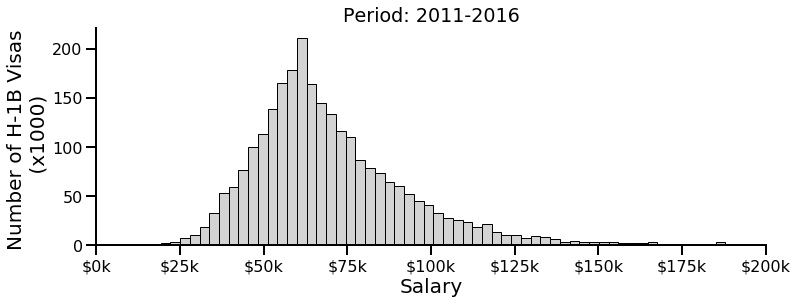

In [27]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
def plothist(pd_col, title):

 fig, ax = plt.subplots(figsize=(12,4))
 ax.hist(pd_col, bins=200,
        facecolor='lightgray', edgecolor='k', alpha=1)
 plt.xlim([0, 200000])

 def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)
 def thousand(x, pos):
    return '%1.0f' % (x*1e-3)
 formatterUSD = FuncFormatter(thousandUSD)
 formatter = FuncFormatter(thousand)

 plt.xlabel('Salary',size=20)
 plt.ylabel('Number of H-1B Visas \n (x1000)', size=20)
 ax.xaxis.set_major_formatter(formatterUSD)
 ax.yaxis.set_major_formatter(formatter)
 ax.tick_params(direction='out', length=10, width=2, colors='k')
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['bottom'].set_linewidth(2)
 ax.spines['left'].set_linewidth(2)
 plt.title(title)

plothist(df['PREVAILING_WAGE'], 'Period: 2011-2016')

## H1-B Wage Distribution per Year 

Text(0.5,1,'H-1B Wage Distribution (2011 to 2016)')

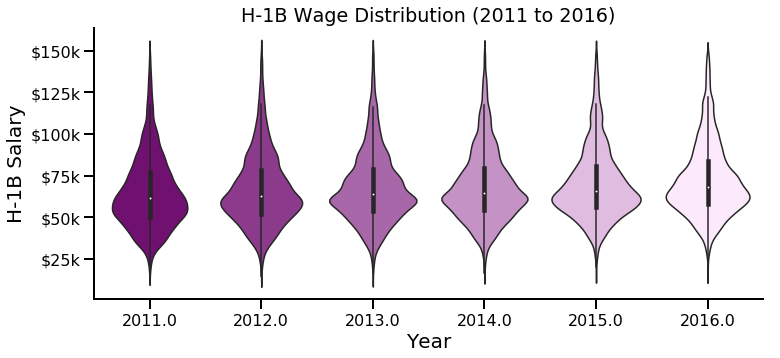

In [28]:
import seaborn as sns
#sns.set_style('white')
df_temp = df[df['PREVAILING_WAGE']<150000]
df_temp.groupby('YEAR')['YEAR'].count()
simple_random_sampling = np.random.randint(0,len(df_temp),70000)
df_temp2 = df_temp.iloc[simple_random_sampling,:]
fig, ax = plt.subplots(figsize=(12,5))
pal = sns.light_palette("purple", reverse=True)
ax = sns.violinplot(x='YEAR',y='PREVAILING_WAGE', data=df_temp2,palette=pal)#,dodge=True)

def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)
formatterUSD = FuncFormatter(thousandUSD)

plt.xlabel('Year',size=20)
plt.ylabel('H-1B Salary', size=20)
ax.yaxis.set_major_formatter(formatterUSD)
ax.tick_params(direction='out', length=10, width=2, colors='k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.title('H-1B Wage Distribution (2011 to 2016)')

# Distribution of H-1B mployers

In [30]:
#employer_name = 
employer_name = df['EMPLOYER_NAME'].value_counts().index.tolist()
employer_petitions = df['EMPLOYER_NAME'].value_counts().tolist()
employer_petitions
df_employer = df['EMPLOYER_NAME'].value_counts().to_frame().head(50)
df_employer = df_employer.reset_index()
df_employer.columns = ['EMPLOYER_NAME','H1B_COUNT']
#df_employer

Text(0.5,0,'Number of Petitions (x1000)')

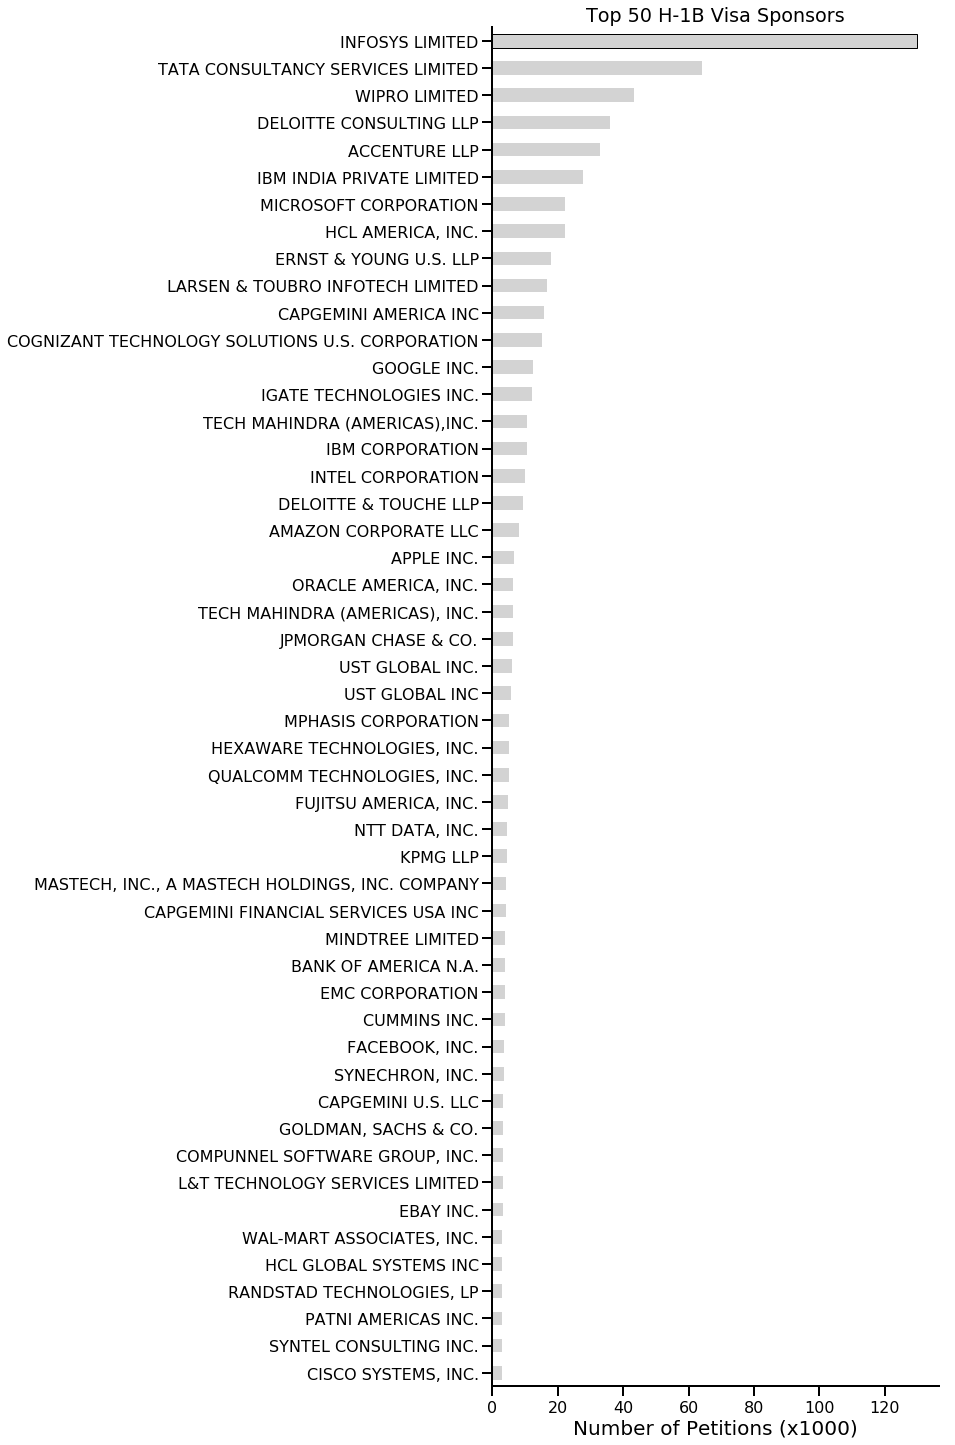

In [31]:
fig, ax = plt.subplots()# figsize=(8,4))
s = df_employer.set_index('EMPLOYER_NAME')['H1B_COUNT']
ax = s.plot(kind='barh', figsize=(8, 25), 
            title='Top 50 H-1B Visa Sponsors',
            facecolor='lightgray', edgecolor='k')
#ax.tick_params(labelbottom='off')
ax.set_ylabel('', visible=False)
ax.tick_params(direction='out', length=10, width=2, colors='k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.invert_yaxis()
def thousand(x, pos):
    return '%1.0f' % (x*1e-3)
formatter = FuncFormatter(thousand)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Number of Petitions (x1000)',size=20)


# Wage Distribution in Top H-1B Visa Sponsors

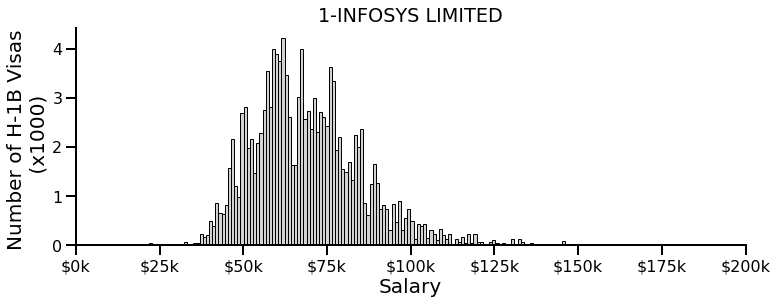

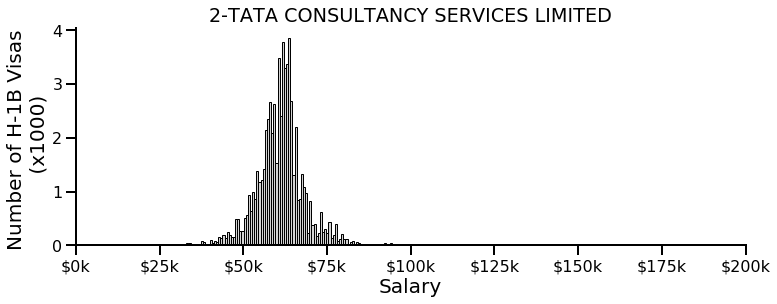

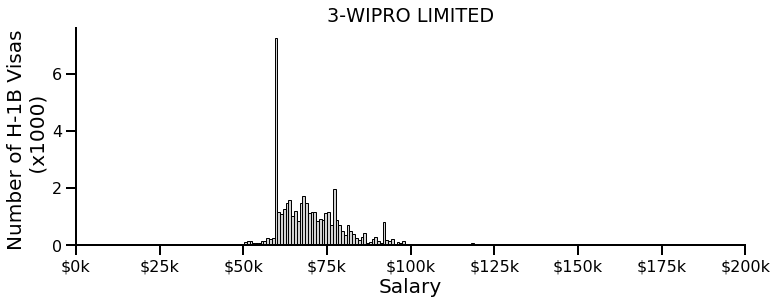

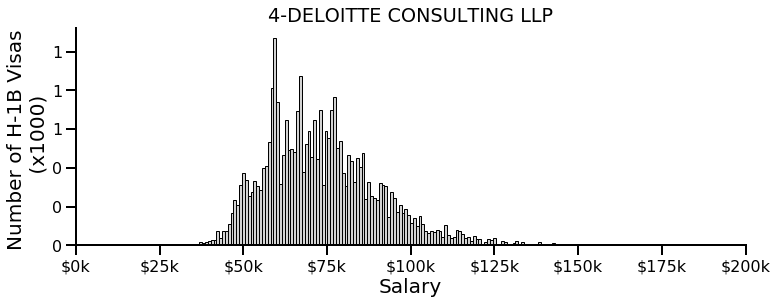

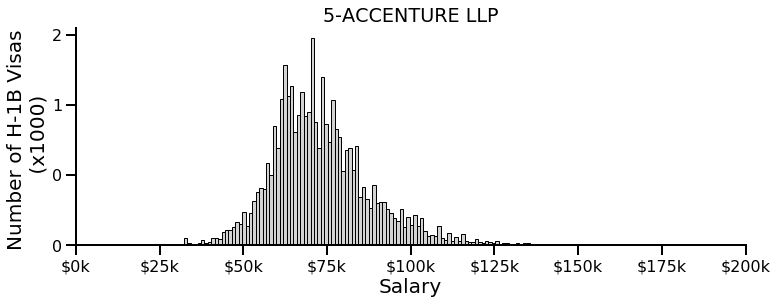

In [32]:
#df.info();
employer_name[0];
for i in range(0,5):
 plothist(df[df['EMPLOYER_NAME']==employer_name[i]]['PREVAILING_WAGE'],
          '%d-%s'%(i+1, employer_name[i]));

# Geographical Distribution of H-1B Employers

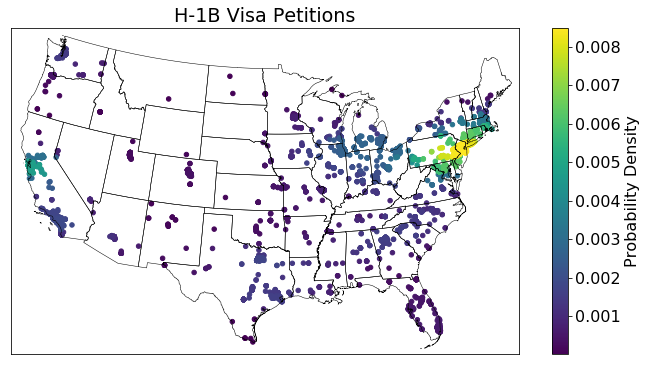

In [33]:
def plotheatmap(df, tittle):
    from mpl_toolkits.basemap import Basemap
    from scipy.stats import gaussian_kde
    import math
    scale = 5
    fig, ax = plt.subplots(figsize=(12,6))

    map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
    map.readshapefile('../input/basemap/st99_d00', name='states', drawbounds=True)

    x = np.asarray(df['lon'].tolist())
    y = np.asarray(df['lat'].tolist())
    where_are_NaNs = np.isnan(y)
    y[where_are_NaNs] = 0
    x[where_are_NaNs] = 0
    where_are_NaNs = np.isnan(x)
    y[where_are_NaNs] = 0
    x[where_are_NaNs] = 0

    where_are_NonZeros = np.nonzero(x)
    x = x[where_are_NonZeros]
    y = y[where_are_NonZeros]
    if len(x) > 10000: nsamples = 10000
    if len(x) < 10000: nsamples = len(x)
    simple_random_sampling = np.random.randint(0,len(x),nsamples)

    xs = x[simple_random_sampling]
    ys = y[simple_random_sampling]
    xy = np.vstack([xs,ys])
    xy = xy.astype('int')
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    xs, ys, z = xs[idx], ys[idx], z[idx]
    xmap,ymap = map(xs,ys)
    heatmap = ax.scatter(xmap,ymap,c=z,s=20,cmap='viridis')
    cb = plt.colorbar(heatmap)
    cb.set_label('Probability Density')
    plt.title(tittle)

plotheatmap(df, 'H-1B Visa Petitions')



# Geographical Distribution of H-1B Top Employers

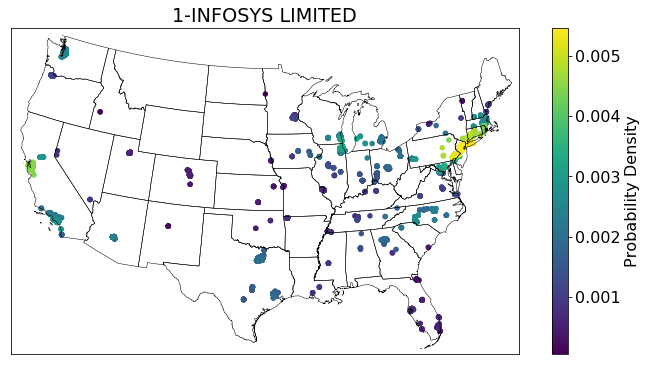

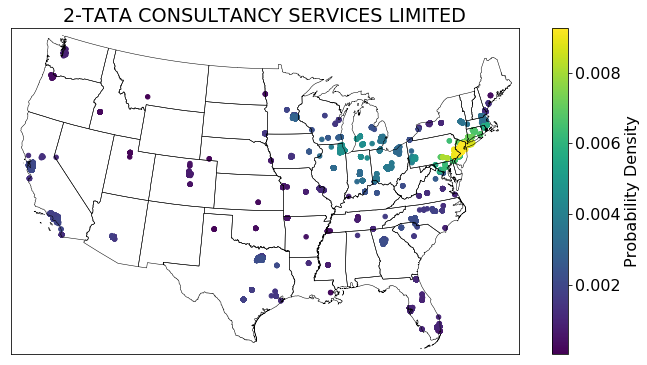

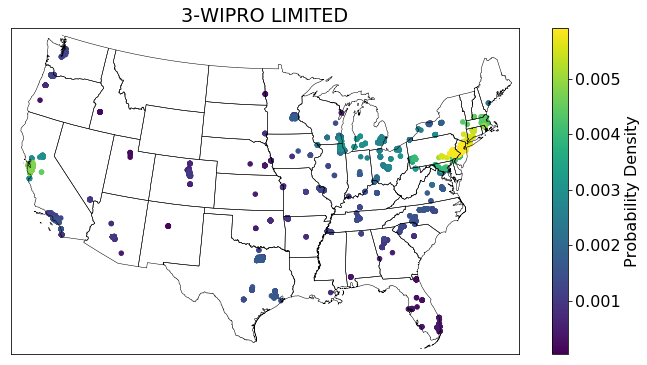

In [34]:
employer_name[0];
for i in range(0,3):
 plotheatmap(df[df['EMPLOYER_NAME']==employer_name[i]],
          '%d-%s'%(i+1, employer_name[i]));
#plt.show()

In [36]:
df_top20_worksite = df.groupby(['WORKSITE'], sort=False).size().nlargest(20).reset_index(name='top20')

# Salary Distribution in Most Populated Cities

In [37]:
df_temp = df_top20_worksite
for worksite in df_top20_worksite['WORKSITE']:
    if i==0: df_temp = df[df['WORKSITE']==worksite]
    if i>0: df_temp = pd.concat([df_temp,df[df['WORKSITE']==worksite]])
    i+=1

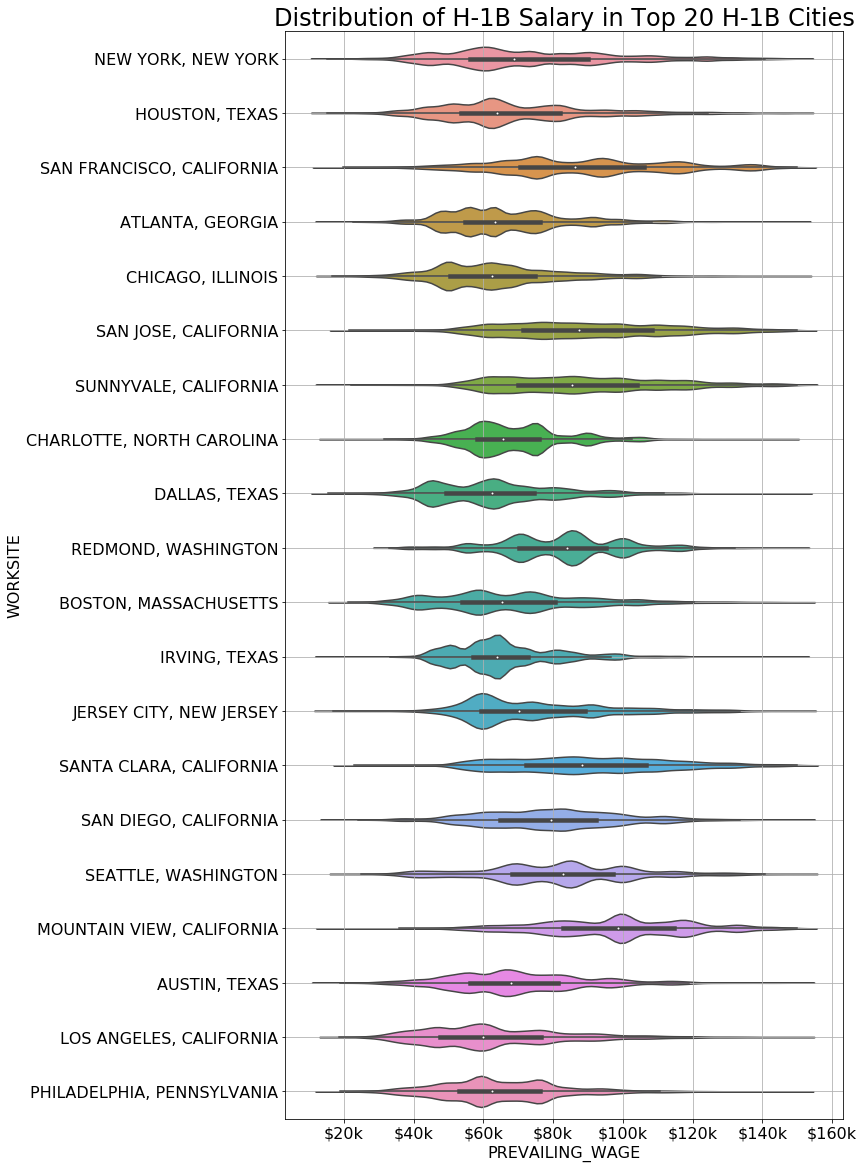

In [38]:
import seaborn as sns
df_temp = df_temp[df_temp['PREVAILING_WAGE']<150000]
fig, ax = plt.subplots(figsize=(10,20))
ax = sns.violinplot(y='WORKSITE',x='PREVAILING_WAGE', data=df_temp,dodge=True)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)

formatterUSD = FuncFormatter(thousandUSD)
ax.xaxis.set_major_formatter(formatterUSD)
ax.set_title('Distribution of H-1B Salary in Top 20 H-1B Cities', fontsize=24)
ax.grid(True)


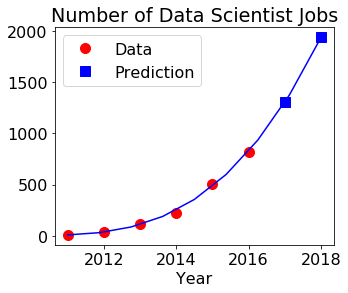

In [40]:
## Data Scientist job is trending and in great demand
## so lets do regression to predict the number of Data Scientist jobs in 2017 and 2018. 
from scipy.optimize import curve_fit

dsj = df[df['JOB_TITLE'] == "DATA SCIENTIST"].groupby('YEAR').count()['JOB_TITLE']
X = np.array(dsj.index)
Y = dsj.values
def func(x, a, b, c):
    return a*np.power(x-2010,b)+c

popt, pcov = curve_fit(func, X, Y)
X1 = np.linspace(2011,2018,9)
X2 = np.linspace(2017,2018,2)
fig = plt.figure(figsize=(5,4))
plt.plot(list(dsj.index), dsj.values, 'ro', markersize=10, label='Data')
plt.plot(X2, func(X2,*popt), 'bs', markersize=10, label='Prediction')
plt.plot(X1, func(X1,*popt), 'b-', label='')
plt.legend()
plt.title('Number of Data Scientist Jobs')
plt.xlabel('Year')
plt.show()
